## Title :
Exercise: ROC & AUC

## Description :
In this exercise, we will look at ways to evaluate our classifiers across all thresholds, rather than just one.

Investigate your options in <a href="https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics" target="_blank">sklearn.metrics</a> for filling in the blanks.

In [16]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

In [17]:
# read the data
heart = pd.read_csv('data/Heart.csv')

# Force the response into a binary indicator:
heart['AHD'] = 1*(heart['AHD'] == "Yes")

heart_train, heart_test = train_test_split(heart, test_size=0.3, random_state = 109)

In [18]:
# Train two logistic regression models, one with l2 penalty and the other one with no penalty
degree = 3
predictors = ['Age','Sex','MaxHR','RestBP','Chol']

poly = PolynomialFeatures(degree=degree, include_bias=False)
scaler = StandardScaler()

X_train = poly.fit_transform(heart_train[predictors])
X_train = scaler.fit_transform(X_train)
y_train = heart_train['AHD']


X_test = poly.transform(heart_test[predictors])
X_test = scaler.transform(X_test)
y_test = heart_test['AHD']


logit = LogisticRegression(penalty=None, max_iter = 10000).fit(X_train, y_train)
logit_ridge = LogisticRegression(C=0.001, penalty='l2',solver='lbfgs', max_iter = 10000).fit(X_train, y_train)

In [19]:
# Predict the probabilities, and then predict the labels based on threshold = 0.5
yhat_logit = logit.predict_proba(X_test)[:,1]
yhat_logit_ridge = logit_ridge.predict_proba(X_test)[:,1]

threshold = 0.5

# Print the confusion matrices
print('The confusion matrix in test for logit when cut-off is',threshold, ': \n',
      sk.metrics.confusion_matrix(y_test, yhat_logit>threshold))
print('The confusion matrix in test for logit_ridge when cut-off is',threshold, ': \n',
      sk.metrics.confusion_matrix(y_test, yhat_logit_ridge>threshold))

The confusion matrix in test for logit when cut-off is 0.5 : 
 [[42 13]
 [13 23]]
The confusion matrix in test for logit_ridge when cut-off is 0.5 : 
 [[44 11]
 [12 24]]


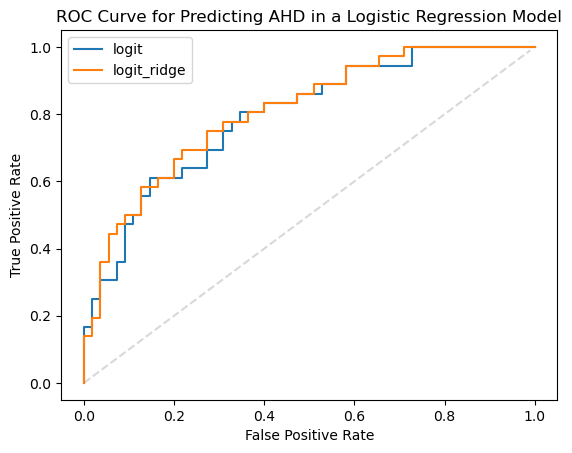

In [20]:
### edTest(test_roc) ###
# Plot the ROC curve
yhat_logit= logit.predict_proba(X_test)[:,1]
yhat_logit_ridge= logit_ridge.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat_logit)
fpr_ridge, tpr_ridge, thresholds_ridge = metrics.roc_curve(y_test, yhat_logit_ridge)

x=np.arange(0,100)/100
plt.plot(x,x,'--',color="gray",alpha=0.3)
plt.plot(fpr,tpr,label="logit")
plt.plot(fpr_ridge,tpr_ridge,label="logit_ridge")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve for Predicting AHD in a Logistic Regression Model")
plt.legend()
plt.show()

In [21]:
### edTest(test_auc) ###
# print the AUC scores
auc_no_reg = metrics.auc(fpr,tpr)
auc_ridge = metrics.auc(fpr_ridge,tpr_ridge)
print(auc_no_reg)
print(auc_ridge)

0.7954545454545454
0.8090909090909092
